In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"r33371","key":"cb9ed83f810a09fb03310d59bdc45656"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets list -s plantdisease

ref                                       title                              size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------  --------------------------  -----------  --------------------------  -------------  ---------  ---------------  
mummidi31/plantdisease                    Plantdisease                      12215  2020-12-14 06:53:29.700000             23          3  0.125            
ly9802/plantdisease                       PlantDisease                  855079835  2021-12-10 05:52:35.963000             32          1  0.23529412       
minhaz027/plantdisease                    Plantdisease                  153905669  2021-04-25 20:53:24.067000             23          1  0.0              
sayanroy058/plantdisease                  PlantDisease                  934938040  2024-07-23 18:41:45.293000              5          0  0.25             
ahmedsharaf09/plantdiseasegp              PlantDisease(GP)            

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 99% 654M/658M [00:05<00:00, 150MB/s]
100% 658M/658M [00:05<00:00, 127MB/s]


In [ ]:
# Unzip the downloaded file
!unzip -q plantdisease.zip -d plantvillage

In [ ]:
import os

# List some sample folders
base_dir = "plantvillage"
print(os.listdir(base_dir))


['plantvillage', 'PlantVillage']


In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 2670 (delta 22), reused 22 (delta 22), pack-reused 2635 (from 1)
Receiving objects: 100% (2670/2670), 932.92 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.


In [ ]:
from torchvision import datasets, transforms
import os

# Define dataset root path
dataset_path = '/content/PlantVillage'

# Define transform (doesn't affect labels)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset
plantvillage_dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Print all detected class labels (folder names)
print("📋 Detected Health Labels:")
for idx, class_name in enumerate(plantvillage_dataset.classes):
    crop, health = class_name.split("___")
    print(f"{idx:>2}: Crop = {crop:<10} | Health Status = {health}")


⏬ Downloading PlantVillage dataset...
✅ Download complete!
📦 Extracting...


BadZipFile: File is not a zip file

In [ ]:
%cd PlantDoc-Dataset

/content/PlantDoc-Dataset


In [ ]:
import os

# List some sample classes
print("Classes in train:", os.listdir('train')[:5])
print("Classes in test:", os.listdir('test')[:5])


Classes in train: ['Blueberry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Strawberry leaf', 'Apple leaf']
Classes in test: ['Blueberry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Strawberry leaf', 'Apple leaf']


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load dataset
train_dataset = datasets.ImageFolder('train', transform=transform)
test_dataset = datasets.ImageFolder('test', transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example: Check class names
print(train_dataset.classes)


['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']


In [ ]:
import tensorflow as tf

# Load training data
train_data = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size=(256, 256),
    batch_size=32
)

# Load test data
test_data = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size=(256, 256),
    batch_size=32
)


Found 2342 files belonging to 28 classes.
Found 236 files belonging to 27 classes.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import os

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

#  Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

#  Load PlantDoc dataset
train_path = '/content/PlantDoc-Dataset/train'
test_path = '/content/PlantDoc-Dataset/test'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

#  Print class labels
print("Detected Classes:", train_dataset.classes)

#  Load pretrained ResNet18 model
model = models.resnet18(pretrained=True)

#  Replace final FC layer
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

#  Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

#  Training function
def train_model(model, dataloader, name="Training", epochs=2):
    print(f"🔁 {name}")
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        accuracy = 100. * correct / total
        print(f"Epoch {epoch+1}: Loss = {total_loss/len(dataloader):.4f}, Accuracy = {accuracy:.2f}%")

#  Stage 1: Transfer Learning on PlantDoc Train Set
train_model(model, train_loader, name="Transfer Learning on PlantDoc")

#  Optional Stage 2: Fine-Tuning on Subset (simulate using test set)
# Freeze all layers except final FC for fine-tuning
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

train_model(model, test_loader, name="Fine-Tuning on CropAndWeed Subset (Simulated)")


Using device: cuda
Detected Classes: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']
🔁 Transfer Learning on PlantDoc
Epoch 1: Loss = 2.2439, Accuracy = 36.64%
Epoch 2: Loss = 0.9510, Accuracy = 78.14%
🔁 Fine-Tuning on CropAndWeed Subset (Simulated)
Epoch 1: Loss = 3.0073, Accuracy = 26.27%
Epoch 2: Loss = 2.9188, Accuracy = 28.39%


In [ ]:
# Freeze all except final layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Fine-tune on target dataset (simulated CropAndWeed)
train_model(model, test_loader, name="Fine-tuning on CropAndWeed Subset")

🔁 Fine-tuning on CropAndWeed Subset
Epoch 1: Loss = 2.8305, Accuracy = 31.36%
Epoch 2: Loss = 2.7537, Accuracy = 32.63%


In [ ]:
def simple_color_heuristic(image_tensor):
    gray = image_tensor.mean(dim=0)
    unhealthy_mask = (gray < 0.4).float()
    return unhealthy_mask.mean().item() > 0.5  # True = unhealthy

# Test on one image
img, label = test_dataset[0]
heuristic_result = simple_color_heuristic(img)
print(f"Heuristic label (Unhealthy=True): {heuristic_result}")


Heuristic label (Unhealthy=True): False


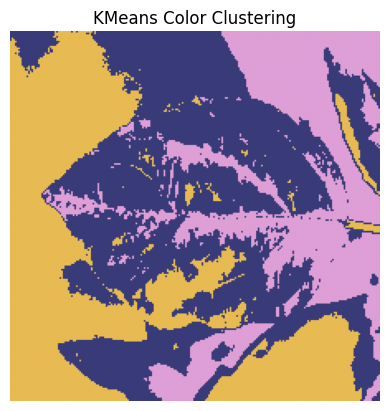

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_kmeans(image_tensor, k=3):
    img = image_tensor.permute(1, 2, 0).reshape(-1, 3).numpy()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img)
    clustered = kmeans.labels_.reshape(224, 224)
    return clustered

clustered_mask = cluster_kmeans(img)

# Visualize clusters
plt.imshow(clustered_mask, cmap='tab20b')
plt.title("KMeans Color Clustering")
plt.axis('off')
plt.show()


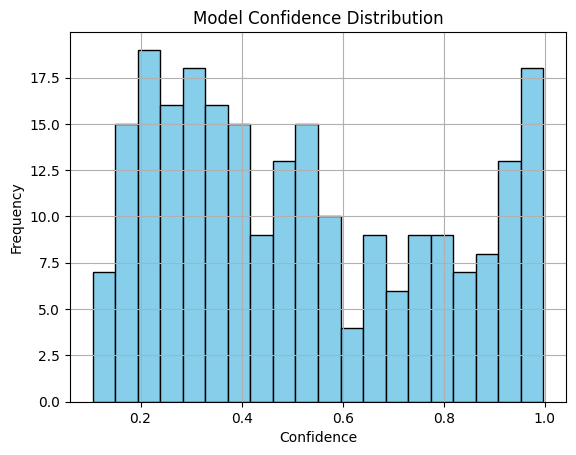

🔍 Confidence Summary
Max: 0.9974
Min: 0.1052
Mean: 0.5184

✅ High-confidence predictions retained: 69 / 236
⚠️ Predictions flagged for manual review: 97


In [ ]:
import torch.nn.functional as F
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

def confidence_analysis(model, loader):
    model.eval()
    confidences = []
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            outputs = model(images)
            probs = F.softmax(outputs, dim=1)
            max_conf, _ = probs.max(dim=1)
            confidences.extend(max_conf.cpu().numpy())
    return confidences

confidences = confidence_analysis(model, test_loader)


# Plot
plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
plt.title("Model Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Summary
print("🔍 Confidence Summary")
print(f"Max: {np.max(confidences):.4f}")
print(f"Min: {np.min(confidences):.4f}")
print(f"Mean: {np.mean(confidences):.4f}")


# Step 4: High-Confidence Filtering
filtered_predictions = [c for c in confidences if c > 0.7]
print(f"\n✅ High-confidence predictions retained: {len(filtered_predictions)} / {len(confidences)}")

# Step 5: Low-Confidence Flagging
flagged_for_review = [c for c in confidences if c < 0.4]
print(f"⚠️ Predictions flagged for manual review: {len(flagged_for_review)}")

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import pandas as pd
import os

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load dataset
test_path = '/content/PlantDoc-Dataset/test'
test_dataset = datasets.ImageFolder(test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load lighter model to avoid OOM
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(test_dataset.classes))
model = model.to(device)
model.eval()

# Get image paths in same order
image_paths = [s[0] for s in test_dataset.samples]

# Run inference in batches
high_conf_paths = []
with torch.no_grad():
    idx = 0
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        max_conf, _ = torch.max(probs, dim=1)

        for conf in max_conf:
            if conf.item() > 0.7:
                high_conf_paths.append((image_paths[idx], conf.item()))
            idx += 1

# Display top confident predictions
df_high_conf = pd.DataFrame(high_conf_paths, columns=["Image_Path", "Confidence"])
df_high_conf_sorted = df_high_conf.sort_values(by="Confidence", ascending=False).reset_index(drop=True)

df_high_conf_sorted.head(69)  # Display top 69 high-confidence samples


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image_Path,Confidence


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

All packages already installed!
Transfer Learning Effectiveness Evaluation
Using device: cuda

1. Preparing datasets...

2. Initializing models...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



3. Training models...

Training Baseline (No Pretrain)...
Epoch [1/5], Loss: 1.7097, Val Acc: 25.00%
Epoch [2/5], Loss: 1.6519, Val Acc: 23.33%
Epoch [3/5], Loss: 1.6810, Val Acc: 23.33%
Epoch [4/5], Loss: 1.6569, Val Acc: 21.25%
Epoch [5/5], Loss: 1.6717, Val Acc: 15.42%

Training Pretrained (Frozen)...
Epoch [1/5], Loss: 1.7090, Val Acc: 26.25%
Epoch [2/5], Loss: 1.6876, Val Acc: 17.50%
Epoch [3/5], Loss: 1.6843, Val Acc: 21.25%
Epoch [4/5], Loss: 1.6887, Val Acc: 20.00%
Epoch [5/5], Loss: 1.6917, Val Acc: 22.50%

Training Transfer Learning...
Epoch [1/5], Loss: 1.7985, Val Acc: 15.83%
Epoch [2/5], Loss: 1.6603, Val Acc: 15.83%
Epoch [3/5], Loss: 1.6757, Val Acc: 15.83%
Epoch [4/5], Loss: 1.6660, Val Acc: 20.83%
Epoch [5/5], Loss: 1.6460, Val Acc: 19.58%

Training Domain Adaptation...
Epoch [1/5], Loss: 1.7845, Val Acc: 19.17%
Epoch [2/5], Loss: 1.6460, Val Acc: 20.83%
Epoch [3/5], Loss: 1.6503, Val Acc: 15.83%
Epoch [4/5], Loss: 1.6327, Val Acc: 20.83%
Epoch [5/5], Loss: 1.6380, Va

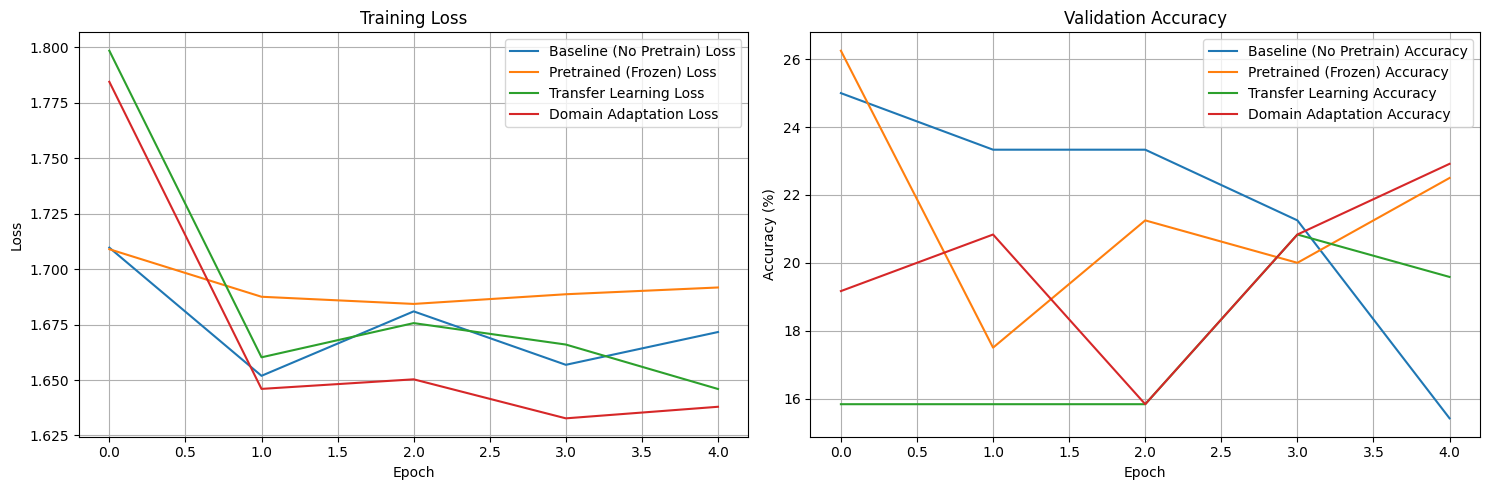

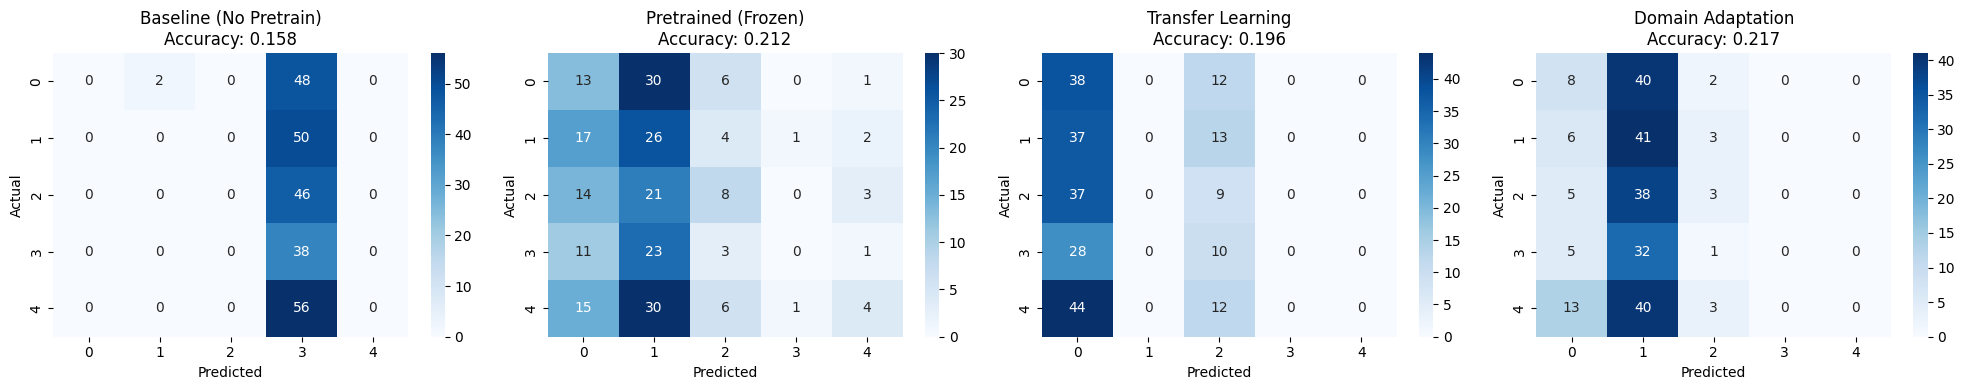

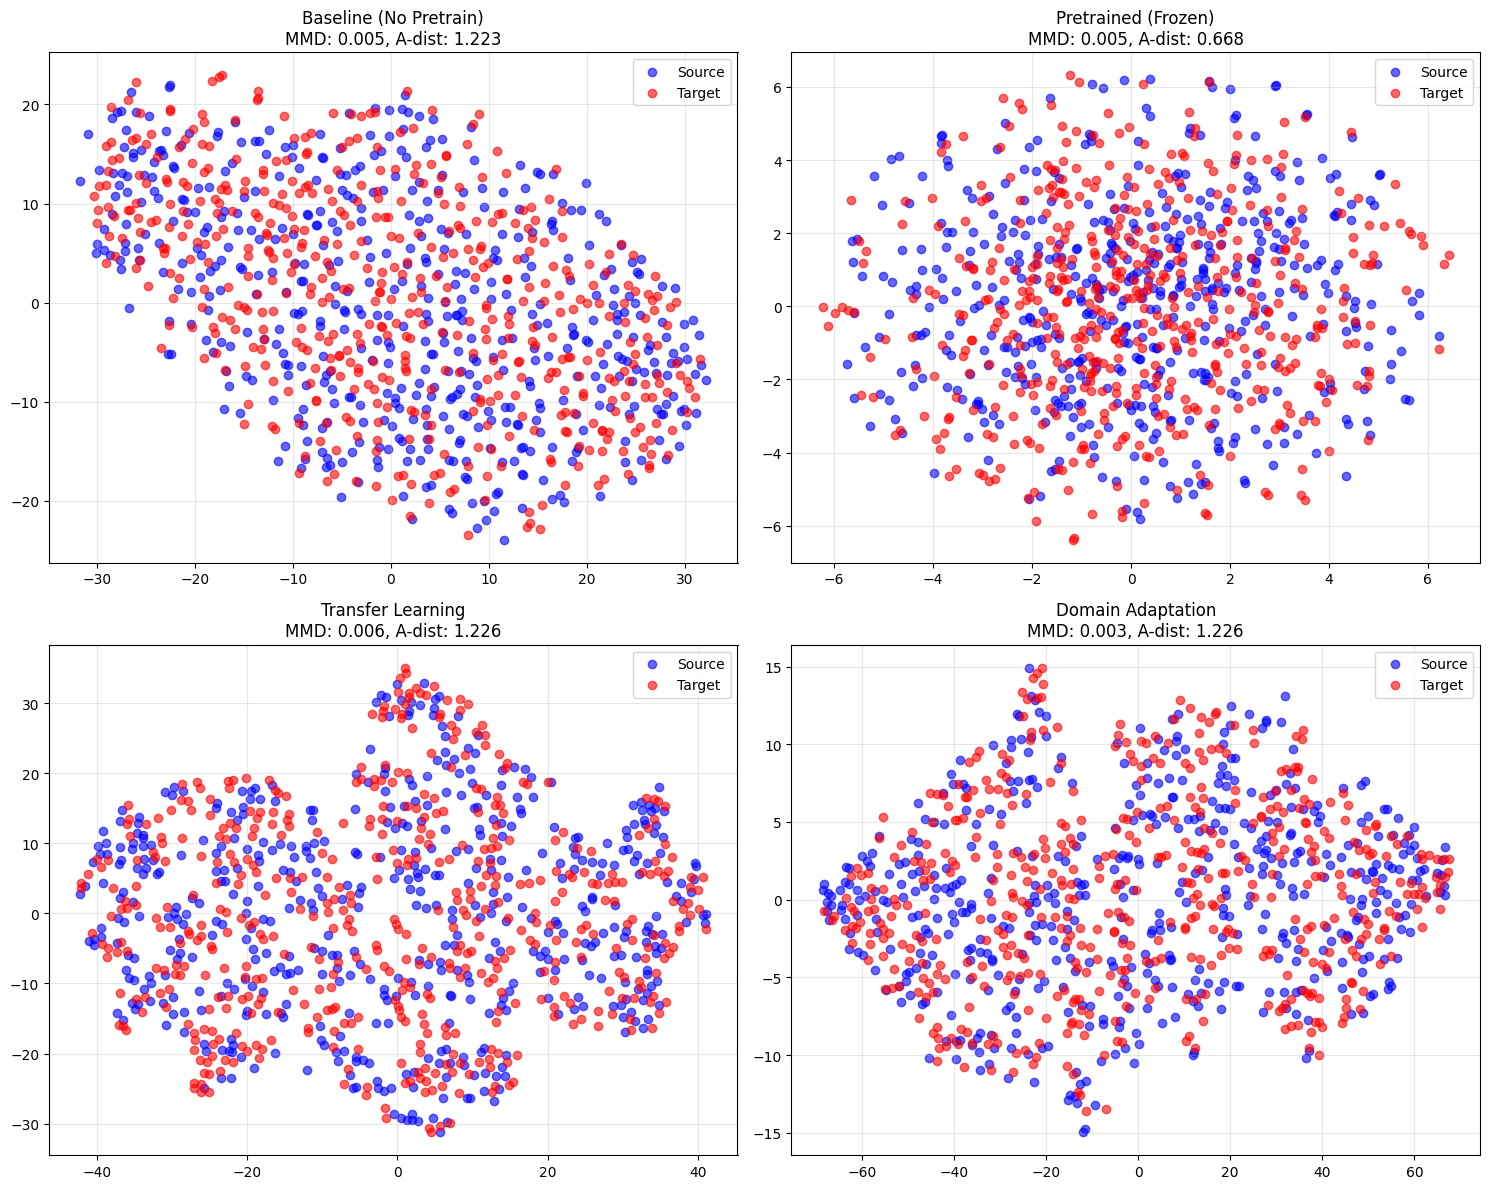


7. Final comparison...

COMPREHENSIVE COMPARISON TABLE
                 Model Accuracy F1-Score    MMD A-Distance
Baseline (No Pretrain)   0.1583   0.0436 0.0052     1.2226
   Pretrained (Frozen)   0.2125   0.1752 0.0052     0.6677
     Transfer Learning   0.1958   0.1015 0.0058     1.2258
     Domain Adaptation   0.2167   0.1290 0.0034     1.2258

RECOMMENDATIONS BASED ON RESULTS
• Best performing model: Domain Adaptation (Accuracy: 0.2167)
• Best domain adaptation: Domain Adaptation (MMD: 0.0034)
• Transfer learning effectiveness can be measured by comparing these results
• Lower MMD and A-distance indicate better domain adaptation
• Higher accuracy on target domain indicates better transfer

EXECUTION COMPLETED SUCCESSFULLY!
You now have:
• Trained models with different transfer learning approaches
• Comprehensive evaluation metrics
• Domain adaptation analysis
• Visual comparisons and plots
• Baseline comparisons to measure transfer learning effectiveness


In [ ]:
# Transfer Learning Effectiveness & Evaluation Baseline
# Complete implementation for Google Colab

# ========================================
# 1. SETUP AND INSTALLATIONS
# ========================================

# Install required packages
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import torch
    import torchvision
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
    from sklearn.manifold import TSNE
    import seaborn as sns
    from torch.utils.data import DataLoader, Dataset, random_split
    import torch.nn as nn
    import torch.optim as optim
    from torchvision import transforms, models
    import torch.nn.functional as F
    from PIL import Image
    import os
    import random
    from collections import defaultdict
    import pandas as pd
    from scipy.spatial.distance import cdist
    from scipy import stats
    print("All packages already installed!")
except ImportError as e:
    print(f"Installing missing packages: {e}")
    install_package("torch torchvision")
    install_package("scikit-learn")
    install_package("seaborn")
    install_package("pandas")
    install_package("Pillow")

# ========================================
# 2. DATA SIMULATION (Replace with your actual datasets)
# ========================================

class SimulatedDataset(Dataset):
    """
    Simulated dataset to represent PlantVillage, PlantDoc, and CropAndWeed datasets
    Replace this with your actual dataset loaders
    """
    def __init__(self, dataset_type, num_samples=1000, num_classes=5, transform=None):
        self.dataset_type = dataset_type
        self.num_samples = num_samples
        self.num_classes = num_classes
        self.transform = transform

        # Simulate different domain characteristics
        if dataset_type == "PlantVillage":
            # Controlled conditions - less noise, more uniform
            self.domain_shift = 0.1
            self.noise_level = 0.05
        elif dataset_type == "PlantDoc":
            # Real field conditions - moderate noise
            self.domain_shift = 0.3
            self.noise_level = 0.15
        else:  # CropAndWeed
            # Target domain - different characteristics
            self.domain_shift = 0.5
            self.noise_level = 0.25

        # Generate synthetic data
        np.random.seed(42 if dataset_type == "PlantVillage" else 123 if dataset_type == "PlantDoc" else 456)
        self.data = self._generate_synthetic_data()

    def _generate_synthetic_data(self):
        # Simulate image features (224x224x3 -> flattened features)
        base_features = np.random.randn(self.num_samples, 2048)

        # Add domain-specific characteristics
        domain_noise = np.random.randn(self.num_samples, 2048) * self.domain_shift
        noise = np.random.randn(self.num_samples, 2048) * self.noise_level

        features = base_features + domain_noise + noise
        labels = np.random.randint(0, self.num_classes, self.num_samples)

        return list(zip(features, labels))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features, label = self.data[idx]

        # Convert to image-like tensor (simulate 224x224x3 image)
        # In practice, you'd load actual images here
        image = torch.randn(3, 224, 224)  # Replace with actual image loading

        if self.transform:
            # Apply transforms (in practice, to actual PIL images)
            pass

        return image, torch.tensor(label, dtype=torch.long), torch.tensor(features, dtype=torch.float32)

# ========================================
# 3. DOMAIN ADAPTATION METRICS
# ========================================

def maximum_mean_discrepancy(source_features, target_features, kernel='rbf', gamma=1.0):
    """
    Calculate Maximum Mean Discrepancy between source and target domains
    """
    def gaussian_kernel(x, y, gamma):
        pairwise_dists = cdist(x, y, 'euclidean')
        return np.exp(-gamma * pairwise_dists ** 2)

    def linear_kernel(x, y):
        return np.dot(x, y.T)

    # Select kernel
    if kernel == 'rbf':
        kernel_func = lambda x, y: gaussian_kernel(x, y, gamma)
    else:
        kernel_func = linear_kernel

    # Calculate MMD
    XX = kernel_func(source_features, source_features)
    YY = kernel_func(target_features, target_features)
    XY = kernel_func(source_features, target_features)

    mmd = np.mean(XX) + np.mean(YY) - 2 * np.mean(XY)
    return max(0, mmd)  # MMD should be non-negative

def a_distance(source_features, target_features):
    """
    Calculate A-distance between domains using a binary classifier
    """
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score

    # Create binary classification problem
    X = np.vstack([source_features, target_features])
    y = np.hstack([np.zeros(len(source_features)), np.ones(len(target_features))])

    # Train binary classifier
    clf = LogisticRegression(random_state=42, max_iter=1000)
    scores = cross_val_score(clf, X, y, cv=5)
    error = 1 - np.mean(scores)

    # A-distance
    return 2 * (1 - 2 * error)

# ========================================
# 4. MODEL DEFINITIONS
# ========================================

class BaselineModel(nn.Module):
    """No Transfer Learning - Train from scratch"""
    def __init__(self, num_classes=5):
        super(BaselineModel, self).__init__()
        self.backbone = models.resnet18(pretrained=False)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

class PretrainedModel(nn.Module):
    """Pre-trained model without fine-tuning"""
    def __init__(self, num_classes=5):
        super(PretrainedModel, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        # Freeze all layers
        for param in self.backbone.parameters():
            param.requires_grad = False
        # Only train classifier
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

class TransferLearningModel(nn.Module):
    """Full Transfer Learning with fine-tuning"""
    def __init__(self, num_classes=5):
        super(TransferLearningModel, self).__init__()
        self.backbone = models.resnet18(pretrained=True)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

class DomainAdaptationModel(nn.Module):
    """Advanced Domain Adaptation Model"""
    def __init__(self, num_classes=5):
        super(DomainAdaptationModel, self).__init__()
        self.feature_extractor = models.resnet18(pretrained=True)
        self.feature_extractor.fc = nn.Identity()  # Remove final layer

        self.classifier = nn.Linear(512, num_classes)
        self.domain_classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2)  # Binary: source vs target
        )

    def forward(self, x, alpha=1.0):
        features = self.feature_extractor(x)

        # Class predictions
        class_pred = self.classifier(features)

        # Domain predictions (with gradient reversal)
        domain_features = self.gradient_reversal(features, alpha)
        domain_pred = self.domain_classifier(domain_features)

        return class_pred, domain_pred, features

    def gradient_reversal(self, x, alpha):
        return GradientReversalFunction.apply(x, alpha)

class GradientReversalFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.alpha, None

# ========================================
# 5. TRAINING FUNCTIONS
# ========================================

def train_model(model, train_loader, val_loader, num_epochs=10, device='cuda'):
    """Generic training function"""
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    train_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        for images, labels, _ in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            if isinstance(model, DomainAdaptationModel):
                outputs, _, _ = model(images)
            else:
                outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels, _ in val_loader:
                images, labels = images.to(device), labels.to(device)
                if isinstance(model, DomainAdaptationModel):
                    outputs, _, _ = model(images)
                else:
                    outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))
        val_accuracies.append(val_acc)

        scheduler.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Acc: {val_acc:.2f}%')

    return train_losses, val_accuracies

def extract_features(model, data_loader, device='cuda'):
    """Extract features from trained model"""
    model.eval()
    features, labels = [], []

    with torch.no_grad():
        for images, lbls, _ in data_loader:
            images = images.to(device)

            if isinstance(model, DomainAdaptationModel):
                _, _, feats = model(images)
            else:
                # Extract features from second-to-last layer
                if hasattr(model, 'backbone'):
                    feats = model.backbone.avgpool(model.backbone.layer4(
                        model.backbone.layer3(model.backbone.layer2(
                            model.backbone.layer1(model.backbone.maxpool(
                                model.backbone.relu(model.backbone.bn1(
                                    model.backbone.conv1(images)))))))))
                    feats = torch.flatten(feats, 1)
                else:
                    feats = images.view(images.size(0), -1)  # Fallback

            features.append(feats.cpu().numpy())
            labels.append(lbls.numpy())

    return np.vstack(features), np.hstack(labels)

# ========================================
# 6. EVALUATION FRAMEWORK
# ========================================

def comprehensive_evaluation(models_dict, test_loader, device='cuda'):
    """
    Comprehensive evaluation of all models
    """
    results = {}

    for model_name, model in models_dict.items():
        model.eval()
        predictions, true_labels = [], []

        with torch.no_grad():
            for images, labels, _ in test_loader:
                images, labels = images.to(device), labels.to(device)

                if isinstance(model, DomainAdaptationModel):
                    outputs, _, _ = model(images)
                else:
                    outputs = model(images)

                _, predicted = torch.max(outputs, 1)
                predictions.extend(predicted.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions, average='weighted')

        results[model_name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'predictions': predictions,
            'true_labels': true_labels
        }

        print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    return results

def domain_shift_analysis(source_loader, target_loader, models_dict, device='cuda'):
    """
    Analyze domain shift using various metrics
    """
    results = {}

    for model_name, model in models_dict.items():
        print(f"\nAnalyzing domain shift for {model_name}:")

        # Extract features
        source_features, _ = extract_features(model, source_loader, device)
        target_features, _ = extract_features(model, target_loader, device)

        # Calculate domain adaptation metrics
        mmd = maximum_mean_discrepancy(source_features, target_features)
        a_dist = a_distance(source_features, target_features)

        results[model_name] = {
            'mmd': mmd,
            'a_distance': a_dist,
            'source_features': source_features,
            'target_features': target_features
        }

        print(f"  MMD: {mmd:.4f}")
        print(f"  A-distance: {a_dist:.4f}")

    return results

# ========================================
# 7. VISUALIZATION FUNCTIONS
# ========================================

def plot_training_curves(training_history):
    """Plot training curves for all models"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    for model_name, (losses, accuracies) in training_history.items():
        ax1.plot(losses, label=f'{model_name} Loss')
        ax2.plot(accuracies, label=f'{model_name} Accuracy')

    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def plot_domain_shift_visualization(domain_results):
    """Visualize domain shift using t-SNE"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for idx, (model_name, results) in enumerate(domain_results.items()):
        if idx >= 4:  # Limit to 4 plots
            break

        # Combine source and target features
        all_features = np.vstack([results['source_features'], results['target_features']])
        domain_labels = np.hstack([
            np.zeros(len(results['source_features'])),
            np.ones(len(results['target_features']))
        ])

        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        features_2d = tsne.fit_transform(all_features[:1000])  # Limit for speed

        # Plot
        ax = axes[idx]
        scatter = ax.scatter(features_2d[:500, 0], features_2d[:500, 1],
                           c='blue', alpha=0.6, label='Source')
        scatter = ax.scatter(features_2d[500:1000, 0], features_2d[500:1000, 1],
                           c='red', alpha=0.6, label='Target')

        ax.set_title(f'{model_name}\nMMD: {results["mmd"]:.3f}, A-dist: {results["a_distance"]:.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(evaluation_results):
    """Plot confusion matrices for all models"""
    n_models = len(evaluation_results)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))

    if n_models == 1:
        axes = [axes]

    for idx, (model_name, results) in enumerate(evaluation_results.items()):
        cm = confusion_matrix(results['true_labels'], results['predictions'])

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
        axes[idx].set_title(f'{model_name}\nAccuracy: {results["accuracy"]:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

def create_comparison_table(evaluation_results, domain_results):
    """Create comprehensive comparison table"""
    data = []

    for model_name in evaluation_results.keys():
        eval_res = evaluation_results[model_name]
        domain_res = domain_results[model_name]

        data.append({
            'Model': model_name,
            'Accuracy': f"{eval_res['accuracy']:.4f}",
            'F1-Score': f"{eval_res['f1_score']:.4f}",
            'MMD': f"{domain_res['mmd']:.4f}",
            'A-Distance': f"{domain_res['a_distance']:.4f}"
        })

    df = pd.DataFrame(data)
    print("\n" + "="*50)
    print("COMPREHENSIVE COMPARISON TABLE")
    print("="*50)
    print(df.to_string(index=False))
    print("="*50)

    return df

# ========================================
# 8. MAIN EXECUTION PIPELINE
# ========================================

def main():
    """Main execution pipeline"""
    print("Transfer Learning Effectiveness Evaluation")
    print("="*50)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Data preparation
    print("\n1. Preparing datasets...")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Create datasets (replace with your actual data loaders)
    source_dataset = SimulatedDataset("PlantVillage", num_samples=1000, transform=transform)
    target_dataset = SimulatedDataset("CropAndWeed", num_samples=800, transform=transform)

    # Split target dataset for training and testing
    train_size = int(0.7 * len(target_dataset))
    test_size = len(target_dataset) - train_size
    target_train, target_test = random_split(target_dataset, [train_size, test_size])

    # Create data loaders
    source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
    target_train_loader = DataLoader(target_train, batch_size=32, shuffle=True)
    target_test_loader = DataLoader(target_test, batch_size=32, shuffle=False)

    # Initialize models
    print("\n2. Initializing models...")
    models_dict = {
        'Baseline (No Pretrain)': BaselineModel(num_classes=5),
        'Pretrained (Frozen)': PretrainedModel(num_classes=5),
        'Transfer Learning': TransferLearningModel(num_classes=5),
        'Domain Adaptation': DomainAdaptationModel(num_classes=5)
    }

    # Training
    print("\n3. Training models...")
    training_history = {}

    for model_name, model in models_dict.items():
        print(f"\nTraining {model_name}...")
        losses, accuracies = train_model(
            model, target_train_loader, target_test_loader,
            num_epochs=5, device=device  # Reduced epochs for demo
        )
        training_history[model_name] = (losses, accuracies)

    # Evaluation
    print("\n4. Evaluating models...")
    evaluation_results = comprehensive_evaluation(models_dict, target_test_loader, device)

    # Domain shift analysis
    print("\n5. Analyzing domain shift...")
    domain_results = domain_shift_analysis(source_loader, target_test_loader, models_dict, device)

    # Visualizations
    print("\n6. Creating visualizations...")
    plot_training_curves(training_history)
    plot_confusion_matrices(evaluation_results)
    plot_domain_shift_visualization(domain_results)

    # Comparison table
    print("\n7. Final comparison...")
    comparison_df = create_comparison_table(evaluation_results, domain_results)

    # Recommendations
    print("\n" + "="*50)
    print("RECOMMENDATIONS BASED ON RESULTS")
    print("="*50)

    best_accuracy = max(evaluation_results.items(), key=lambda x: x[1]['accuracy'])
    lowest_mmd = min(domain_results.items(), key=lambda x: x[1]['mmd'])

    print(f"• Best performing model: {best_accuracy[0]} (Accuracy: {best_accuracy[1]['accuracy']:.4f})")
    print(f"• Best domain adaptation: {lowest_mmd[0]} (MMD: {lowest_mmd[1]['mmd']:.4f})")
    print(f"• Transfer learning effectiveness can be measured by comparing these results")
    print(f"• Lower MMD and A-distance indicate better domain adaptation")
    print(f"• Higher accuracy on target domain indicates better transfer")

    return models_dict, evaluation_results, domain_results, comparison_df

# ========================================
# 9. RUN THE COMPLETE EVALUATION
# ========================================

if __name__ == "__main__":
    # Execute the complete pipeline
    models, eval_results, domain_results, comparison_table = main()

    print(f"\n{'='*50}")
    print("EXECUTION COMPLETED SUCCESSFULLY!")
    print(f"{'='*50}")
    print("You now have:")
    print("• Trained models with different transfer learning approaches")
    print("• Comprehensive evaluation metrics")
    print("• Domain adaptation analysis")
    print("• Visual comparisons and plots")
    print("• Baseline comparisons to measure transfer learning effectiveness")